In [9]:
import pandas as pd

# Load the data
data = pd.read_csv('NOTEEVENTS.csv', nrows=50000)  # Adjust nrows as needed for performance

# Load diagnoses data
diagnoses = pd.read_csv('DIAGNOSES_ICD.csv')


In [10]:
# Load diagnoses data
diagnoses = pd.read_csv('DIAGNOSES_ICD.csv')

# Filter for Diabetes Mellitus ICD-9 codes
diabetes_codes = [f'250{str(i).zfill(2)}' for i in range(0, 100)]
diabetes_diagnoses = diagnoses[diagnoses['ICD9_CODE'].isin(diabetes_codes)].copy()

# Create a unique identifier for SUBJECT_ID and HADM_ID
diabetes_diagnoses.loc[:, 'SUBJ_HADM_ID'] = diabetes_diagnoses['SUBJECT_ID'].astype(str) + '_' + diabetes_diagnoses['HADM_ID'].astype(str)

# Similarly, prepare the notes data
data['SUBJ_HADM_ID'] = data['SUBJECT_ID'].astype(str) + '_' + data['HADM_ID'].astype(str)

# Merge the notes with the Diabetes diagnoses
diabetes_notes = data[data['SUBJ_HADM_ID'].isin(diabetes_diagnoses['SUBJ_HADM_ID'])].copy()

# Reset index
diabetes_notes = diabetes_notes.reset_index(drop=True)


In [11]:
import re

# Remove null TEXT entries
diabetes_notes = diabetes_notes.dropna(subset=['TEXT'])

# Function to clean text
def clean_text(text):
    text = re.sub(r'\[\*\*.*?\*\*\]', '', text)  # Remove de-identification brackets
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

diabetes_notes['CLEAN_TEXT'] = diabetes_notes['TEXT'].apply(clean_text)


In [12]:
import spacy

# Load SpaCy's English model
nlp_spacy = spacy.load('en_core_web_sm')

# Load SciSpaCy's models
nlp_scispacy = spacy.load('en_core_sci_sm')

# Load SciSpaCy's NER model for biomedical data
nlp_scispacy_ner = spacy.load('en_ner_bc5cdr_md')


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_sci_sm' (0.4.0) was trained with spaCy v3.0.1 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.4.0) was trained with spaCy v3.0.1 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [13]:
doc_spacy = nlp_spacy(diabetes_notes['CLEAN_TEXT'][0])
print("SpaCy Entities:")
for ent in doc_spacy.ents:
    print(f"{ent.text} - {ent.label_}")


SpaCy Entities:
Zocor / Lescol Attending - ORG
History of Present Illness - WORK_OF_ART
84 - CARDINAL
1 - CARDINAL
28 - CARDINAL
25-30% - PERCENT
CAD - ORG
s/p CABG - ORG
SVG - ORG
LIMA - GPE
SVG-OM - ORG
SVG - ORG
Hospital ER - FAC
this morning - TIME
10:30 last evening - TIME
1 hour - TIME
6 am - TIME
EMS - ORG
109/66 - CARDINAL
71 - CARDINAL
O2 - CARDINAL
88% - PERCENT
RA - ORG
CXR - ORG
0.4 - CARDINAL
CK - ORG
70 - CARDINAL
80 - CARDINAL
IV - GPE
Lovenox 80 - PERSON
SQ - PERSON
IVF - ORG
last night - TIME
11 - CARDINAL
1 gallon - CARDINAL
first - ORDINAL
the past year - DATE
ROS - ORG
several months ago - DATE
a few days - DATE
hematuria - GPE
Foley - PERSON
Lovenox - PERSON
1 - CARDINAL
2 - CARDINAL
3 - CARDINAL
4. - CARDINAL
5 - CARDINAL
5. - CARDINAL
LVEF 25-30% - ORG
6 - CARDINAL
SVG - ORG
LIMA - GPE
SVG-OM - ORG
SVG - ORG
SVG - ORG
one - CARDINAL
SVG - ORG
LIMA - GPE
LAD - ORG
Family History - PERSON
44 - DATE
one - CARDINAL
40 - DATE
one - CARDINAL
50 - DATE
NAD - ORG
101 - C

In [14]:
doc_scispacy = nlp_scispacy(diabetes_notes['CLEAN_TEXT'][0])
print("\nSciSpaCy Entities:")
for ent in doc_scispacy.ents:
    print(f"{ent.text} - {ent.label_}")



SciSpaCy Entities:
Admission - ENTITY
Discharge Date - ENTITY
Service - ENTITY
MEDICINE Allergies - ENTITY
Zocor - ENTITY
Lescol - ENTITY
Attending - ENTITY
Chief Complaint - ENTITY
Chest pain - ENTITY
Surgical - ENTITY
Invasive Procedure - ENTITY
Central venous line insertion - ENTITY
right internal jugular vein) History of Present - ENTITY
Illness - ENTITY
Mr. - ENTITY
man - ENTITY
moderate - ENTITY
outside - ENTITY
hospital echo - ENTITY
cm2 - ENTITY
gradient - ENTITY
mmHg - ENTITY
moderate - ENTITY
mitral regurgitation - ENTITY
mild aortic insufficiency - ENTITY
chronic left ventricular systolic heart failure - ENTITY
EF - ENTITY
hypertension - ENTITY
hyperlipidemia - ENTITY
diabetes mellitus - ENTITY
CAD - ENTITY
CABG - ENTITY
SVG-LAD-Diagonal - ENTITY
SVG-OM - ENTITY
SVG-RPDA-RPL - ENTITY
CABG - ENTITY
LIMA-LAD - ENTITY
SVG-OM - ENTITY
SVG-diagonal - ENTITY
SVG-RCA - ENTITY
peripheral arterial disease - ENTITY
peripheral bypass surgery - ENTITY
Hospital ER - ENTITY
morning - ENT

In [15]:
doc_scispacy_ner = nlp_scispacy_ner(diabetes_notes['CLEAN_TEXT'][0])
print("\nSciSpaCy NER Entities:")
for ent in doc_scispacy_ner.ents:
    print(f"{ent.text} - {ent.label_}")



SciSpaCy NER Entities:
Allergies - DISEASE
Zocor - CHEMICAL
Lescol - CHEMICAL
Chest pain - DISEASE
stenosis - DISEASE
mitral regurgitation - DISEASE
aortic insufficiency - DISEASE
chronic left ventricular systolic heart failure - DISEASE
hypertension - DISEASE
hyperlipidemia - DISEASE
diabetes mellitus - DISEASE
CAD - DISEASE
SVG-OM - CHEMICAL
SVG-OM - CHEMICAL
peripheral arterial disease - DISEASE
shortness of breath - DISEASE
chest pain - DISEASE
heart failure - DISEASE
chest pain - DISEASE
nausea - DISEASE
diaphoresis - DISEASE
dypsnea - DISEASE
pain - DISEASE
NTG - CHEMICAL
pain - DISEASE
O2 - CHEMICAL
RA - DISEASE
congestive heart failure - DISEASE
troponin-I - CHEMICAL
aspirin - CHEMICAL
furosemide - CHEMICAL
Lovenox - CHEMICAL
knee pain - DISEASE
osteoarthritis - DISEASE
chest pain - DISEASE
pain - DISEASE
pain - DISEASE
dyspnea - DISEASE
orthopnea - DISEASE
nocturnal dyspnea - DISEASE
exertional dyspnea - DISEASE
dyspneic - DISEASE
chest pain - DISEASE
ROS - CHEMICAL
nose blee

In [16]:
from spacy import displacy

# SpaCy Visualization
displacy.render(doc_spacy, style="ent", jupyter=True)

# SciSpaCy Visualization
displacy.render(doc_scispacy_ner, style="ent", jupyter=True)


In [17]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

def preprocess(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS and len(token) > 3]

documents = diabetes_notes['CLEAN_TEXT'].map(preprocess)


In [18]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=documents, vector_size=100, window=5, min_count=2, workers=4)


In [19]:
# Most similar words to 'insulin'
print("Words similar to 'insulin':")
print(model.wv.most_similar('insulin'))



Words similar to 'insulin':
[('humalog', 0.7126625180244446), ('lantus', 0.6957399845123291), ('insuling', 0.6520899534225464), ('hiss', 0.6348435878753662), ('insuln', 0.6166067719459534), ('riss', 0.595574140548706), ('fingersticks', 0.5858661532402039), ('glargin', 0.5817741751670837), ('units', 0.555779755115509), ('ultralente', 0.5463814735412598)]


In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Get vocabulary
vocab = list(model.wv.key_to_index)
# Limit to top N words for visualization
top_n = 100
vocab = vocab[:top_n]

# Get word vectors
X = model.wv[vocab]



In [21]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)



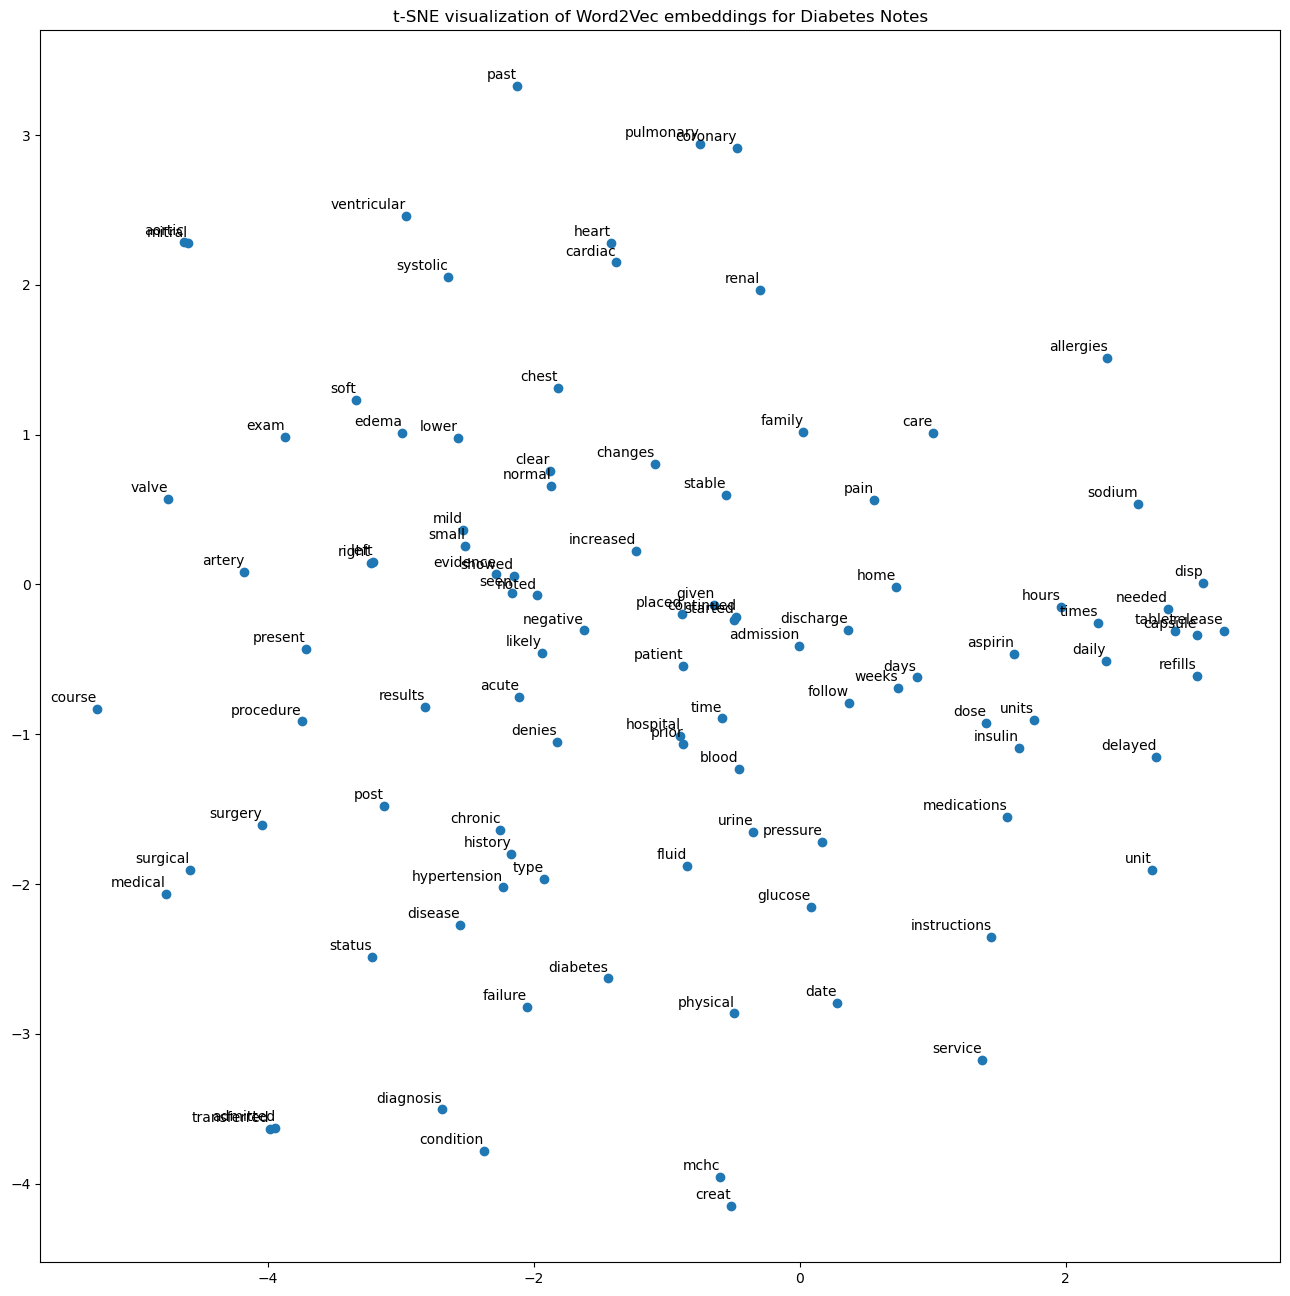

In [22]:
plt.figure(figsize=(16, 16))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

for i, word in enumerate(vocab):
    plt.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]), textcoords='offset points', xytext=(0, 5), ha='right')
plt.title('t-SNE visualization of Word2Vec embeddings for Diabetes Notes')
plt.show()


In [23]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model_bert = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")


In [24]:
# Tokenize and encode a sample note
inputs = tokenizer(diabetes_notes['CLEAN_TEXT'][0], return_tensors="pt", max_length=512, truncation=True)

# Get the embeddings
with torch.no_grad():
    outputs = model_bert(**inputs)

embeddings = outputs.last_hidden_state  # Shape: [batch_size, sequence_length, hidden_size]


In [25]:
# Convert embeddings to numpy for visualization
token_embeddings = embeddings[0].numpy()

# Get tokens
tokens = tokenizer.tokenize(diabetes_notes['CLEAN_TEXT'][0], max_length=512, truncation=True)


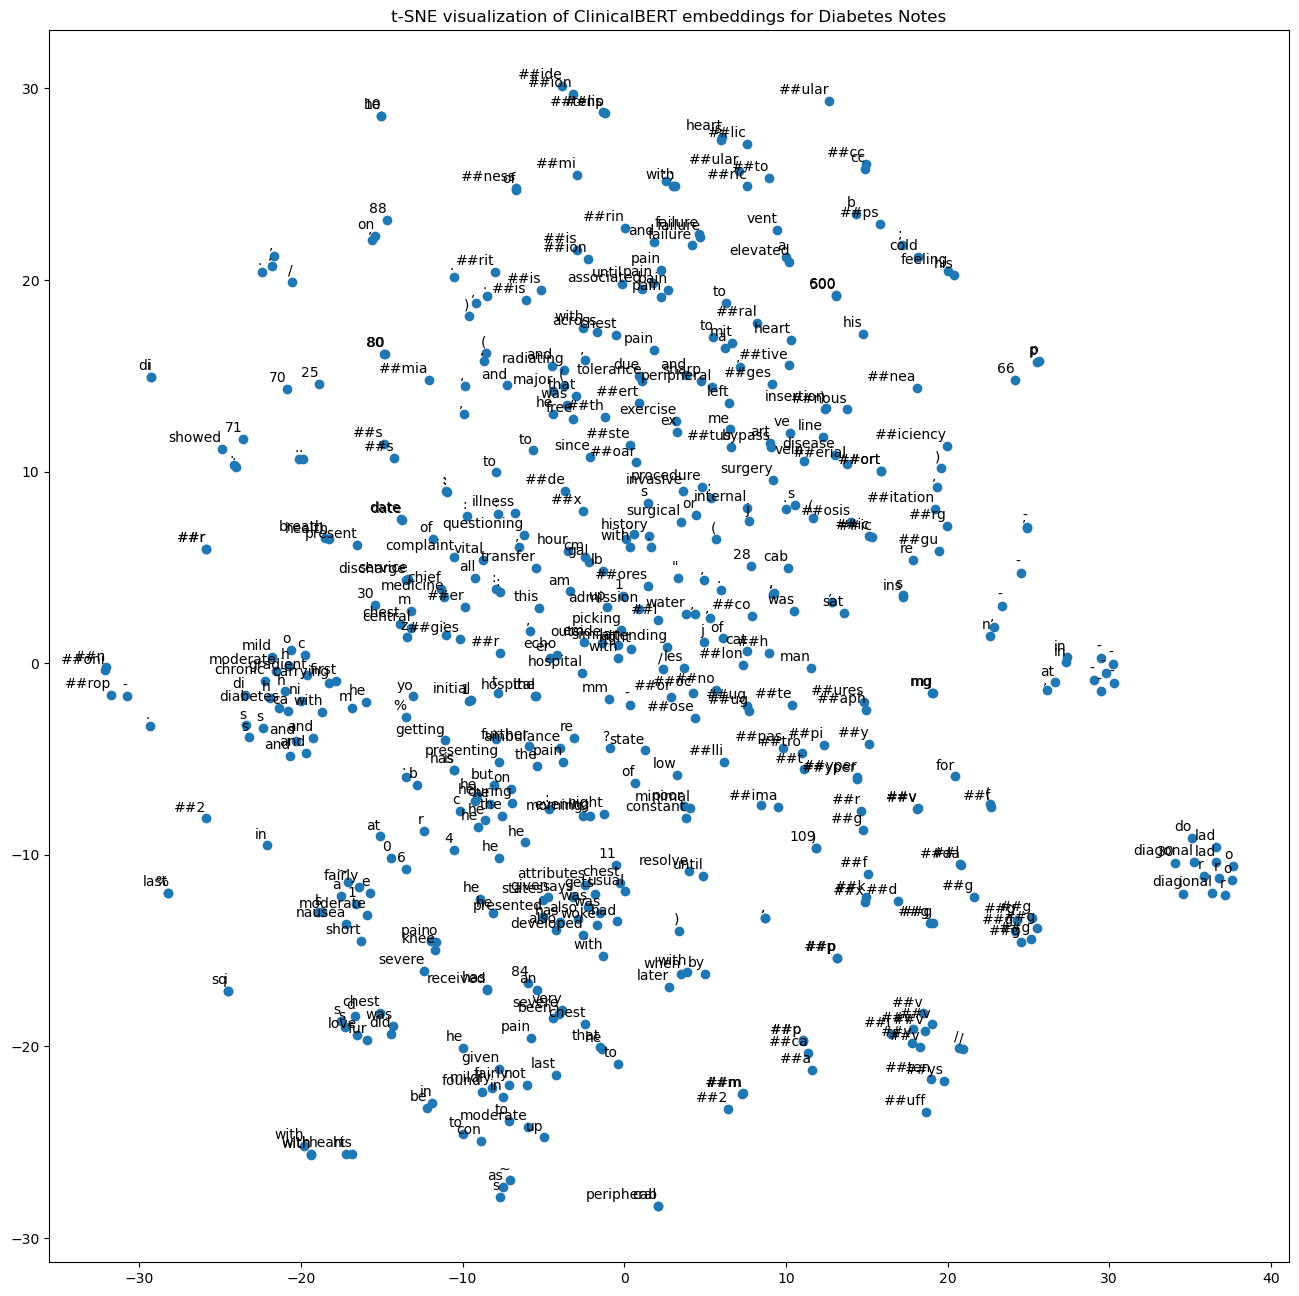

In [26]:
# Reduce dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_tsne = tsne.fit_transform(token_embeddings)

# Plot
plt.figure(figsize=(16, 16))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1])

for i, token in enumerate(tokens):
    plt.annotate(token, xy=(embeddings_tsne[i, 0], embeddings_tsne[i, 1]), textcoords='offset points', xytext=(0, 5), ha='right')
plt.title('t-SNE visualization of ClinicalBERT embeddings for Diabetes Notes')
plt.show()


In [27]:
# Load standard BERT tokenizer
from transformers import BertTokenizer, BertModel

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize with standard BERT
bert_tokens = bert_tokenizer.tokenize(diabetes_notes['CLEAN_TEXT'][0], max_length=512, truncation=True)

# Compare tokens
print("Standard BERT Tokens:")
print(bert_tokens)

print("\nClinicalBERT Tokens:")
print(tokens)


Keyword arguments {'max_length': 512, 'truncation': True} not recognized.


Standard BERT Tokens:
['admission', 'date', ':', 'discharge', 'date', ':', 'service', ':', 'medicine', 'all', '##er', '##gies', ':', 'z', '##oco', '##r', '/', 'les', '##col', 'attending', ':', 'chief', 'complaint', ':', 'chest', 'pain', 'major', 'surgical', 'or', 'invasive', 'procedure', ':', 'central', 've', '##nous', 'line', 'insertion', '(', 'right', 'internal', 'jug', '##ular', 'vein', ')', 'history', 'of', 'present', 'illness', ':', 'mr', '.', 'is', 'an', '84', 'yo', 'man', 'with', 'moderate', 'ao', '##rti', '##c', 'ste', '##nosis', '(', 'outside', 'hospital', 'echo', 'in', 'with', '1', 'cm', '##2', ',', 'gradient', '28', 'mm', '##hg', ',', 'moderate', 'mit', '##ral', 'reg', '##urg', '##itation', ',', 'mild', 'ao', '##rti', '##c', 'ins', '##uf', '##fi', '##ciency', ')', ',', 'chronic', 'left', 'vent', '##ric', '##ular', 'sy', '##sto', '##lic', 'heart', 'failure', 'with', 'e', '##f', '25', '-', '30', '%', ',', 'hyper', '##tension', ',', 'hyper', '##lip', '##ide', '##mia', ',', 'dia

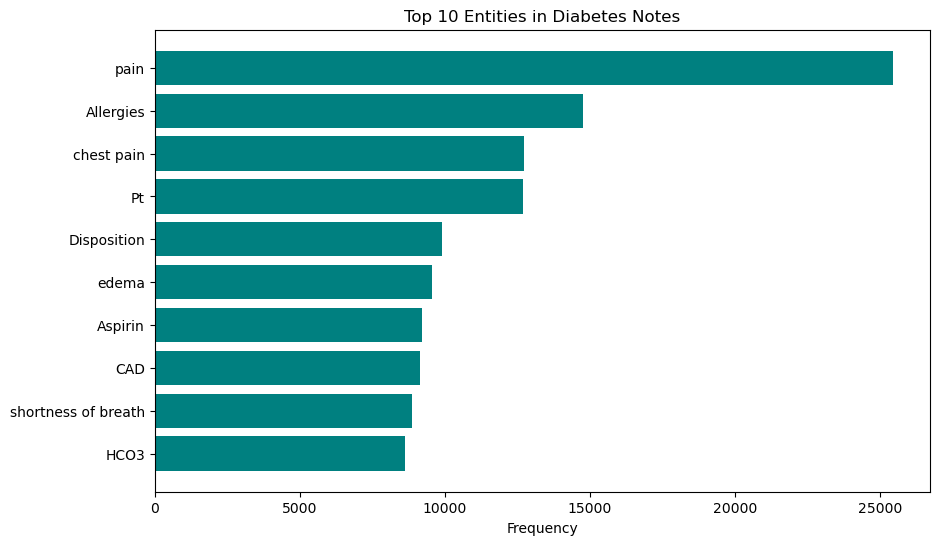

In [28]:
# Extract entities from all diabetes notes
entities = []
for text in diabetes_notes['CLEAN_TEXT']:
    doc = nlp_scispacy_ner(text)
    entities.extend([ent.text for ent in doc.ents])

# Count entity frequencies
from collections import Counter
entity_counts = Counter(entities)
most_common_entities = entity_counts.most_common(10)

# Separate labels and counts
labels, counts = zip(*most_common_entities)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(labels, counts, color='teal')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.title('Top 10 Entities in Diabetes Notes')
plt.show()
